# Data Preparation
### Import Library

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

### Membaca dataset

In [14]:
df = pd.read_csv('C:/Users/Asus/Documents/DSLS/Dataset/data_penumpang_bus_sekolah_bulan_januari.csv')
df.head(10)

,type_operasi,area_operasi,jumlah_bus,jumlah_penumpang
0,RSUD CENGKARENG,JAKARTA,125.0,5203.0
1,RSUD CENGKARENG,BOGOR,NaN,NaN
2,RSUD CENGKARENG,DEPOK,30.0,692.0
3,RSUD CENGKARENG,TANGERANG,70.0,1232.0
4,RSUD CENGKARENG,BEKASI,24.0,233.0
5,RSUD DUREN SAWIT,JAKARTA,95.0,4887.0
6,RSUD DUREN SAWIT,BOGOR,NaN,NaN
7,RSUD DUREN SAWIT,DEPOK,NaN,NaN
8,RSUD DUREN SAWIT,TANGERANG,NaN,NaN
9,RSUD DUREN SAWIT,BEKASI,NaN,NaN


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 441 entries, 0 to 440
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   type_operasi      441 non-null    object 
 1   area_operasi      441 non-null    object 
 2   jumlah_bus        412 non-null    float64
 3   jumlah_penumpang  412 non-null    float64
dtypes: float64(2), object(2)
memory usage: 13.9+ KB


### Mengecek data yang kosong

In [15]:
df.isna().sum()

type_operasi         0
area_operasi         0
jumlah_bus          29
jumlah_penumpang    29
dtype: int64

### membuang data kosong

In [17]:
df = df.dropna()
df.head(10)

,type_operasi,area_operasi,jumlah_bus,jumlah_penumpang
0,RSUD CENGKARENG,JAKARTA,125.0,5203.0
2,RSUD CENGKARENG,DEPOK,30.0,692.0
3,RSUD CENGKARENG,TANGERANG,70.0,1232.0
4,RSUD CENGKARENG,BEKASI,24.0,233.0
5,RSUD DUREN SAWIT,JAKARTA,95.0,4887.0
11,RSUD PASAR MINGGU,BOGOR,12.0,104.0
12,RSUD PASAR MINGGU,DEPOK,21.0,278.0
14,RSUD PASAR MINGGU,BEKASI,18.0,191.0
16,RSUD TARAKAN,BOGOR,31.0,1593.0
17,RSUD TARAKAN,DEPOK,31.0,1272.0


### Mengecek jumlah baris yang duplicate 

In [18]:
df.duplicated().sum()

138

### Membuang data yang duplicate

In [19]:
print("Jumlah baris sebelum memfilter duplikat: ", len(df))
df = df.drop_duplicates()
print("Jumlah baris setelah memfilter duplikat: ", len(df))

Jumlah baris sebelum memfilter duplikat:  412
Jumlah baris setelah memfilter duplikat:  274


### Membuat atribut baru

In [20]:
df['penumpang_per_bus'] = df['jumlah_penumpang'] / df['jumlah_bus']
df.head()

,type_operasi,area_operasi,jumlah_bus,jumlah_penumpang,penumpang_per_bus
0,RSUD CENGKARENG,JAKARTA,125.0,5203.0,41.624000
2,RSUD CENGKARENG,DEPOK,30.0,692.0,23.066667
3,RSUD CENGKARENG,TANGERANG,70.0,1232.0,17.600000
4,RSUD CENGKARENG,BEKASI,24.0,233.0,9.708333
5,RSUD DUREN SAWIT,JAKARTA,95.0,4887.0,51.442105


In [21]:
df['nama'] = df['type_operasi'] + str("-") + df['area_operasi'].str[:2] 
df.head()

,type_operasi,area_operasi,jumlah_bus,jumlah_penumpang,penumpang_per_bus,nama
0,RSUD CENGKARENG,JAKARTA,125.0,5203.0,41.624000,RSUD CENGKARENG-JA
2,RSUD CENGKARENG,DEPOK,30.0,692.0,23.066667,RSUD CENGKARENG-DE
3,RSUD CENGKARENG,TANGERANG,70.0,1232.0,17.600000,RSUD CENGKARENG-TA
4,RSUD CENGKARENG,BEKASI,24.0,233.0,9.708333,RSUD CENGKARENG-BE
5,RSUD DUREN SAWIT,JAKARTA,95.0,4887.0,51.442105,RSUD DUREN SAWIT-JA


# Analytics

### Statistika deskriptif

In [22]:
df.describe()

,jumlah_bus,jumlah_penumpang,penumpang_per_bus
count,274.000000,274.000000,274.000000
mean,7.631387,249.569343,16.187912
std,19.816537,873.158922,11.702882
min,1.000000,3.000000,3.000000
25%,1.000000,9.000000,9.000000
50%,1.000000,13.500000,13.000000
75%,1.000000,22.000000,19.000000
max,125.000000,6566.000000,86.903226


### Korelasi antar atribut

In [23]:
df.corr()

,jumlah_bus,jumlah_penumpang,penumpang_per_bus
jumlah_bus,1.000000,0.894379,0.545446
jumlah_penumpang,0.894379,1.000000,0.702511
penumpang_per_bus,0.545446,0.702511,1.000000


### Mencari lima data terbesar tiap atribut

In [24]:
jp = df.sort_values(by=['jumlah_penumpang'], ascending = False)
jp.head(5)

,type_operasi,area_operasi,jumlah_bus,jumlah_penumpang,penumpang_per_bus,nama
44,R S C M,BEKASI,92.0,6566.0,71.369565,R S C M-BE
40,R S C M,JAKARTA,62.0,5388.0,86.903226,R S C M-JA
0,RSUD CENGKARENG,JAKARTA,125.0,5203.0,41.624000,RSUD CENGKARENG-JA
5,RSUD DUREN SAWIT,JAKARTA,95.0,4887.0,51.442105,RSUD DUREN SAWIT-JA
67,RSPI SULIANTI SAROSO,JAKARTA,91.0,4378.0,48.109890,RSPI SULIANTI SAROSO-JA


In [25]:
jb = df.sort_values(by=['jumlah_bus'], ascending = False)
jb.head()

,type_operasi,area_operasi,jumlah_bus,jumlah_penumpang,penumpang_per_bus,nama
0,RSUD CENGKARENG,JAKARTA,125.0,5203.0,41.624000,RSUD CENGKARENG-JA
25,RSUD KOJA,JAKARTA,103.0,3912.0,37.980583,RSUD KOJA-JA
29,RSUD KOJA,BEKASI,100.0,2192.0,21.920000,RSUD KOJA-BE
5,RSUD DUREN SAWIT,JAKARTA,95.0,4887.0,51.442105,RSUD DUREN SAWIT-JA
41,R S C M,BOGOR,92.0,3617.0,39.315217,R S C M-BO


In [26]:
ppb = df.sort_values(by=['penumpang_per_bus'], ascending = False)
ppb.head()

,type_operasi,area_operasi,jumlah_bus,jumlah_penumpang,penumpang_per_bus,nama
40,R S C M,JAKARTA,62.0,5388.0,86.903226,R S C M-JA
44,R S C M,BEKASI,92.0,6566.0,71.369565,R S C M-BE
31,RS PONDOK INDAH,BOGOR,31.0,1870.0,60.322581,RS PONDOK INDAH-BO
42,R S C M,DEPOK,62.0,3627.0,58.500000,R S C M-DE
18,RSUD TARAKAN,TANGERANG,58.0,3162.0,54.517241,RSUD TARAKAN-TA


### Mengelompokkan data berdasar area operasi

In [27]:
n_by_area =  df.groupby('area_operasi')['type_operasi'].count()
n_by_area

area_operasi
BEKASI             10
BOGOR               8
DEPOK               7
JAKARTA             9
RS Wisma Atlet    235
TANGERANG           5
Name: type_operasi, dtype: int64

# Data Visualization

### Heatmap yang menunjukkan korelasi antar atribut

<AxesSubplot:>

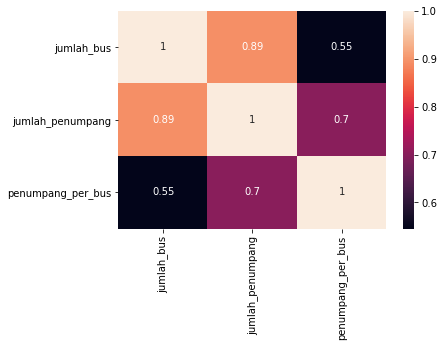

In [28]:
sns.heatmap(df.corr(), annot =True)

### Visualisasi pengelompokkan berdasar area

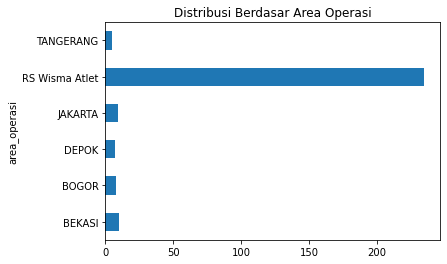

In [29]:
n_by_area.plot.barh('y_axis','x_axis')
plt.title('Distribusi Berdasar Area Operasi')
plt.show()

### Visualisasi pengelompokkan berdasar area tanpa RS Wisma Atlet

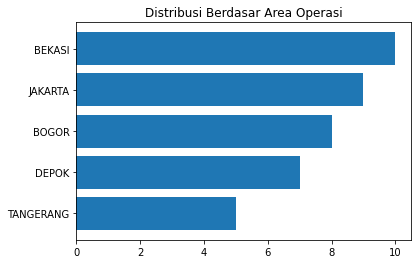

In [30]:
x = [10,9,8,7,5]
x.reverse()
y = ['BEKASI','JAKARTA','BOGOR','DEPOK','TANGERANG']
y.reverse()
plt.barh(y,x)
plt.title('Distribusi Berdasar Area Operasi')
plt.show()

### Visualisasi data terbanyak tiap atribut

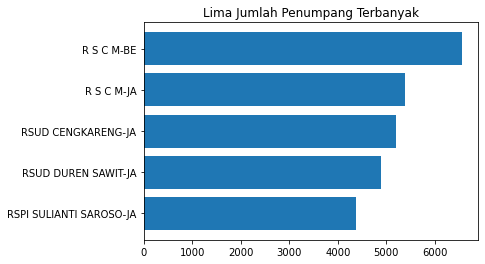

In [31]:
x = list(jp.iloc[:5,3])
x.reverse()
y = list(jp.iloc[:5,5])
y.reverse()
plt.barh(y,x)
plt.title('Lima Jumlah Penumpang Terbanyak')
plt.show()

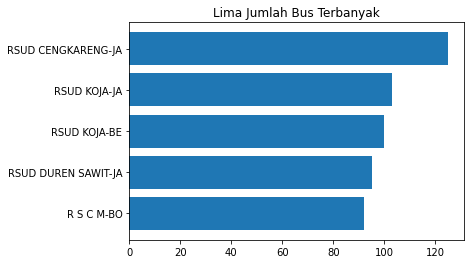

In [32]:
x = list(jb.iloc[:5,2])
x.reverse()
y = list(jb.iloc[:5,5])
y.reverse()
plt.barh(y,x)
plt.title('Lima Jumlah Bus Terbanyak')
plt.show()

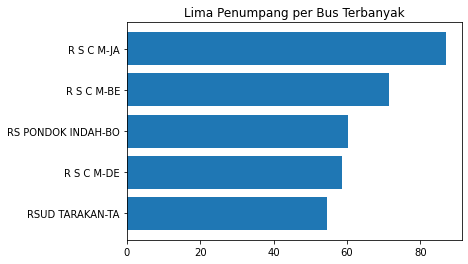

In [41]:
x = list(ppb.iloc[:5,4])
x.reverse()
y = list(ppb.iloc[:5,5])
y.reverse()
plt.barh(y,x)
plt.title('Lima Penumpang per Bus Terbanyak')
plt.show()